In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/GitHub/master-thesis

/content/drive/MyDrive/GitHub/master-thesis


# Load Daten

In [4]:
behaviour_cols = ['Q1_2_covid_is_threat',
 'Q2_1_easy_to_follow_advice',
 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3_if_follow_advice_safe',
 'Q2_4_if_follow_advice_others_safe',
 'Q2_5_follow_advice_relationships_impared',
 'Q2_6_follow_advice_life_degraded',
 'Q3_1_aware_hand_hygiene',
 'Q3_2_avoid_contact',
 'Q3_3_ensure_frequent_cleaning',
 'Q3_4_avoid_risk_groups',
 'Q3_5_keep_distance',
 'Q3_6_avoid_crowds',
 'Q3_7_minimize_activities_w_contact',
 'Q5_4_yourself_kept_distance',
 'Q5_5_feel_urge_scold',
 'Q6_2_advices_important',
 'Q6_3_others_can_avoid_spreading',
 'Q6_5_ownership_of_advice',
 'Q6_6_clear_information_on_advice_reason',
 'Q6_7_advice_limits_daily_activities',
 'Q6_9_trust_political_strategy',
 'Ny1_nr_times_wearing_masks_last_week']

In [5]:
 data_path='data/preprocessing/220216_preprocessed_data_missing_data.csv'
 df = pd.read_csv(data_path)

In [6]:
df_beh = df[behaviour_cols].copy()

# Scale

In [7]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(df_beh)
df_beh_scaled = pd.DataFrame(data=x, columns=df_beh.columns.tolist())
df_beh_scaled.head()

,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,...,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Ny1_nr_times_wearing_masks_last_week
0,0.632796,0.666667,1.0,0.500000,1.0,0.500000,0.666667,0.833333,1.000000,0.666667,...,1.000000,0.80623,0.000000,1.000000,0.666667,1.0,1.000000,0.833333,0.833333,1.00
1,1.000000,1.000000,1.0,0.666667,1.0,0.833333,0.666667,1.000000,1.000000,1.000000,...,1.000000,1.00000,0.000000,0.833333,0.666667,1.0,0.833333,0.166667,1.000000,0.00
2,1.000000,1.000000,1.0,1.000000,1.0,0.500000,0.333333,1.000000,1.000000,0.666667,...,0.666667,1.00000,1.000000,1.000000,0.666667,0.5,1.000000,0.166667,1.000000,0.25
3,0.833333,0.000000,1.0,0.166667,0.0,1.000000,0.500000,1.000000,0.333333,1.000000,...,0.666667,1.00000,1.000000,1.000000,0.500000,0.0,1.000000,0.333333,1.000000,1.00
4,0.666667,0.000000,0.0,0.166667,0.0,0.166667,0.166667,0.666667,0.833333,0.500000,...,0.666667,0.50000,0.833333,0.000000,0.166667,0.0,0.166667,0.000000,0.000000,0.75


# Correlation Matrix

In [8]:
corr = df_beh.corr()

In [9]:
import plotly.express as px

fig = px.imshow(corr, width=1100, height=1100, color_continuous_scale='RdBu_r', range_color=[-1,1])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(62),
        ticktext = corr.columns.values),
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(62),
        ticktext = corr.columns.values
    )
)
fig.show()

# High Correlation

In [10]:
c = corr.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

Q1_2_covid_is_threat                      Q1_2_covid_is_threat                        1.000000
Q3_6_avoid_crowds                         Q3_6_avoid_crowds                           1.000000
Q2_3_if_follow_advice_safe                Q2_3_if_follow_advice_safe                  1.000000
Q2_4_if_follow_advice_others_safe         Q2_4_if_follow_advice_others_safe           1.000000
Q2_5_follow_advice_relationships_impared  Q2_5_follow_advice_relationships_impared    1.000000
                                                                                        ...   
Q2_2_can_follow_advice_if_wanted          Ny1_nr_times_wearing_masks_last_week        0.004161
Q2_5_follow_advice_relationships_impared  Q6_3_others_can_avoid_spreading             0.001928
Q6_3_others_can_avoid_spreading           Q2_5_follow_advice_relationships_impared    0.001928
Q2_4_if_follow_advice_others_safe         Ny1_nr_times_wearing_masks_last_week        0.000231
Ny1_nr_times_wearing_masks_last_week      Q2_4_if_

In [11]:
threshold = 0.55 
so_interesting = so[(threshold<so) & (so<1)].reset_index()
cols_to_plot = sorted(so_interesting['level_0'].unique().tolist())
so_interesting = so_interesting[so_interesting.index % 2 != 0]
so_interesting

,level_0,level_1,0
1,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,0.672332
3,Q3_2_avoid_contact,Q3_7_minimize_activities_w_contact,0.642897
5,Q3_2_avoid_contact,Q3_5_keep_distance,0.623989
7,Q6_2_advices_important,Q6_5_ownership_of_advice,0.609510
9,Q6_9_trust_political_strategy,Q6_6_clear_information_on_advice_reason,0.597557
11,Q6_2_advices_important,Q6_9_trust_political_strategy,0.597288
13,Q3_6_avoid_crowds,Q3_2_avoid_contact,0.581280
15,Q3_5_keep_distance,Q3_7_minimize_activities_w_contact,0.578276
17,Q5_4_yourself_kept_distance,Q3_5_keep_distance,0.575185
19,Q3_5_keep_distance,Q3_6_avoid_crowds,0.568888


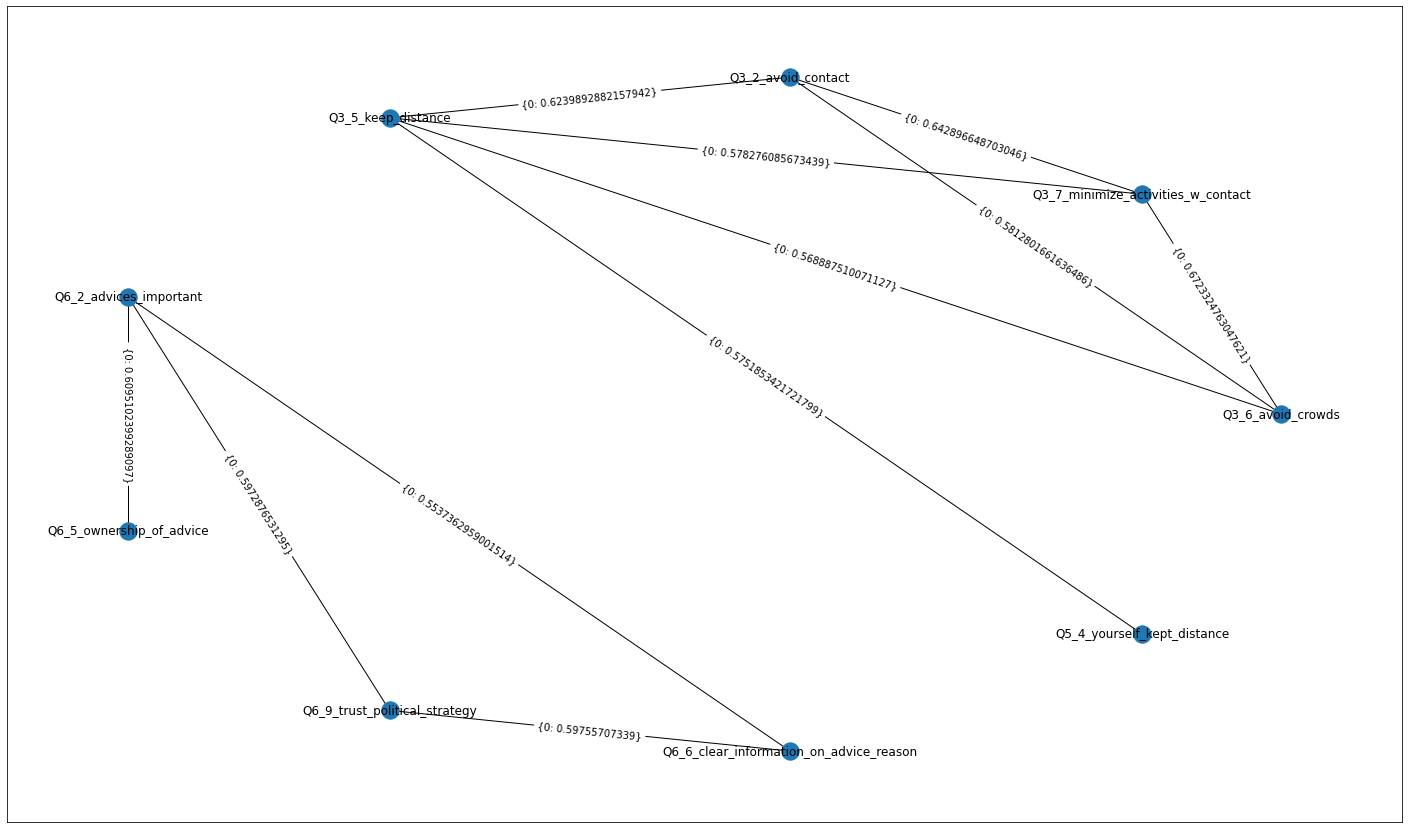

In [12]:
import networkx as nx
G = nx.from_pandas_edgelist(so_interesting, source='level_0', target='level_1', edge_attr=0)
pos = nx.circular_layout(G)
# larger figure size
plt.figure(3,figsize=(25,15)) 
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G,pos)
plt.show()

# Lineplots

In [13]:
df_beh_ravg = df_beh.copy()
df_beh_ravg['date'] = df['date']
df_beh_ravg = df_beh_ravg.groupby('date').mean().rolling(7).mean().reset_index()
df_beh_ravg.dropna(inplace=True)
df_beh_ravg.head(2)

,date,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,...,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Ny1_nr_times_wearing_masks_last_week
6,2020-06-04,4.457714,5.429879,5.995965,5.569515,6.151917,4.190696,3.324468,6.290361,5.688348,...,5.341174,5.958095,2.812785,5.923318,4.656986,5.060365,5.341878,4.267165,5.165048,1.929807
7,2020-06-05,4.496958,5.459021,5.989577,5.614377,6.143397,4.186941,3.313785,6.315583,5.723173,...,5.315608,5.971393,2.779577,5.944544,4.632400,5.084945,5.362364,4.230071,5.223158,1.929807


In [14]:
px.line(df_beh_ravg, x='date', y=cols_to_plot) #y=behaviour_cols